## Notebook Overview

TODO RARS 

In [16]:
import theano
import theano.tensor as T
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

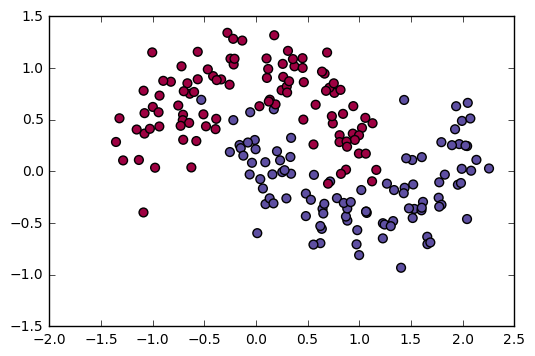

In [17]:
# A random seed for all numpy randomized operations
np.random.seed (0)

# Makes two interleaving half-circles based on the 
# gaussian distribution
X_dataset, y_dataset = make_moons (200, noise=0.20)

# Plot the data we generated
plt.scatter (X_dataset[:,0], X_dataset[:,1], s=40, c=y_dataset, cmap=plt.cm.Spectral)
plt.show ()

In [18]:
def plot_decision_boundary (prediction_function):
    # Set minimum and maximum values for the X and Y axis
    x_min, x_max = X_dataset[:,0].min () - 0.5, X_dataset[:,0].max () + 0.5
    y_min, y_max = X_dataset[:,1].min () - 0.5, X_dataset[:,1].max () + 0.5
    
    # Generate a grid of points with distance h between them
    h = 0.01
    xx, yy = np.meshgrid (np.arange (x_min, x_max, h), np.arange (y_min, y_max, h))
    
    # We predict the value of our function throughout the entire grid
    Z = prediction_function (np.c_[xx.ravel (), yy.ravel ()])
    Z = Z.reshape (xx.shape)
    
    # Plot the contour's (decision boundary) and training examples
    plt.contourf (xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter (X_dataset[:,0], X_dataset[:,1], c=y_dataset, cmap=plt.cm.Spectral)

## Basic Neural Network

TODO RARS

In [19]:
# Useful variables for later
num_examples = len (X_dataset)

# Neural-Net Dimensions
nn_input_dim = 2
nn_hdim = 5
nn_output_dim = 2

# Learning Rate & Regularization
learning_rate = 0.01
reg_lambda = 0.01

In [20]:
# Theano Variables for our data vectors
X = T.matrix('X')
y = T.lvector('y')

# Definition of our model
W1 = theano.shared (np.random.randn (nn_input_dim, nn_hdim), name="W1")
b1 = theano.shared (np.random.randn (nn_hdim), name="b1")
W2 = theano.shared (np.random.randn (nn_hdim, nn_output_dim), name="W2")
b2 = theano.shared (np.random.randn (nn_output_dim), name="b2")

In [21]:
#===============Forward Propagation===============#
# Input -> Hidden Layer Calculation
z1 = X.dot (W1) + b1
a1 = T.tanh (z1)

# Hidden Layer -> Output Calculation
z2 = a1.dot (W2) + b2
y_hat = theano.tensor.nnet.softmax (z2)

#===============Prediction===============#
prediction = T.argmax (y_hat, axis=1)

#===============Loss Calculation===============#
# Regularization Parameter Calculation
loss_reg = 1./num_examples * reg_lambda/2 * (T.sum (T.sqr (W1)) + T.sum (T.sqr (W2)))

# Cross-Entropy Loss Calculation
loss = theano.tensor.nnet.categorical_crossentropy (y_hat, y).mean () + loss_reg

In [22]:
forward_prop = theano.function ([X], y_hat)
predict = theano.function ([X], prediction)
calculate_loss = theano.function ([X,y], loss)

In [23]:
dW2 = theano.grad (loss, W2)
db2 = theano.grad (loss, b2)
dW1 = theano.grad (loss, W1)
db1 = theano.grad (loss, b1)

gradient_step = theano.function ([X,y],
                                 updates=((W2, W2 - learning_rate * dW2),
                                          (b2, b2 - learning_rate * db2),
                                          (W1, W1 - learning_rate * dW1),
                                          (b1, b1 - learning_rate * db1))
                                )

def build_model (num_passes=20000, print_loss=False):
    np.random.seed (43)
    W1.set_value(np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim))
    b1.set_value(np.zeros(nn_hdim))
    W2.set_value(np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim))
    b2.set_value(np.zeros(nn_output_dim))
    
    for i in xrange (0, num_passes):
        gradient_step (X_dataset, y_dataset)
        
        if print_loss and i % 1000 == 0:
             print "Loss after iteration %i: %f" %(i, calculate_loss(X_dataset, y_dataset))

Loss after iteration 0: 0.465805
Loss after iteration 1000: 0.315613
Loss after iteration 2000: 0.308838
Loss after iteration 3000: 0.307346
Loss after iteration 4000: 0.306567
Loss after iteration 5000: 0.305896
Loss after iteration 6000: 0.305210
Loss after iteration 7000: 0.304423
Loss after iteration 8000: 0.303410
Loss after iteration 9000: 0.301955
Loss after iteration 10000: 0.299663
Loss after iteration 11000: 0.295847
Loss after iteration 12000: 0.289471
Loss after iteration 13000: 0.279503
Loss after iteration 14000: 0.265826
Loss after iteration 15000: 0.249746
Loss after iteration 16000: 0.233215
Loss after iteration 17000: 0.217719
Loss after iteration 18000: 0.203943
Loss after iteration 19000: 0.192003


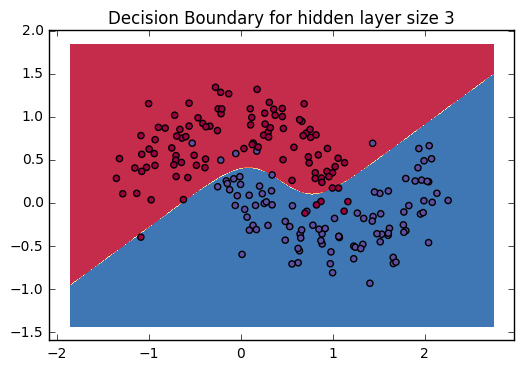

In [24]:
model = build_model (print_loss=True)

plot_decision_boundary(lambda x: predict(x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show ()